## NBA Statistics During Golden State Warriors (GSW) Championship Run Project - Model Prediction

### Introduction:

This section of the project utilizes the findings from the exploratory analysis section of the project to build a predictive model. The model will attempt to predict season performance (measured in wins) of NBA teams and thereby determine whether a team is able to make it into the playoffs.

Imported libraries are Pandas, Numpy, Matplotlib, Seaborn, Scikit-Learn, Statsmodels along with select associated modules; in addition, the copy and plotting modules, and imgkit wrapper have been imported.

In [1]:
# Import libraries to perform split on data and linear regression model fitting
import pandas as pd # library for data manipulation and analysis
import numpy as np # library adding support for large arrays and matrices, including mathematical functions
import matplotlib.pyplot as plt # library for general plotting of data
import matplotlib.patches as mpatches # module to manipulate legend in graphs
%matplotlib inline
import copy # module for deep copy as needed
from pandas.plotting import table as tb # module for plotting table

# Machine learning algorithms and stats libraries 
from sklearn.model_selection import train_test_split # module to split data into train & test sets
from sklearn.linear_model import LinearRegression # module to perform LinearRegression model fitting on data
from sklearn.preprocessing import StandardScaler # module to perform preprocessing of data; scale data
from sklearn import metrics # module to perform calculations for metrics of model
import statsmodels.api as sm # stats library tool
import statsmodels.formula.api as smf # module with R-style formulas

In [2]:
# read in csv file to view data in pandas
all_teams_df = pd.read_csv("all_teams_df_stats.csv")

In [3]:
# take a look at data frame
all_teams_df.head(10)

,Season,Tm,W,Age,3P,3P%,DRB,AST,BLK,AstTOVr,TS%
0,2019,ATL,29,25.1,1067.0,0.352,2825.0,2118,419.0,1.516106,0.555335
1,2018,ATL,24,25.4,917.0,0.360,2693.0,1946,348.0,1.525078,0.547285
2,2017,ATL,43,27.9,729.0,0.341,2793.0,1938,397.0,1.497682,0.541192
3,2016,ATL,48,28.2,815.0,0.350,2772.0,2100,486.0,1.712887,0.551629
4,2015,ATL,60,27.8,818.0,0.380,2611.0,2111,380.0,1.808912,0.563425
5,2019,BOS,49,25.7,1032.0,0.365,2849.0,2155,435.0,2.048479,0.567060
6,2018,BOS,55,24.7,939.0,0.377,2878.0,1842,373.0,1.603133,0.552276
7,2017,BOS,53,25.9,985.0,0.359,2698.0,2069,340.0,1.901654,0.566643
8,2016,BOS,48,25.2,717.0,0.335,2733.0,1981,348.0,1.757764,0.530749
9,2015,BOS,40,25.0,660.0,0.327,2685.0,2009,294.0,1.773169,0.522812


In [4]:
# double check if any data is null
print(all_teams_df.isnull().any())

Season     False
Tm         False
W          False
Age        False
3P         False
3P%        False
DRB        False
AST        False
BLK        False
AstTOVr    False
TS%        False
dtype: bool


The statsmodels library doesn't properly interpret features with special characters (e.g. %) and that begin with numerical values &mdash; rename column names 3P, 3P%, TS%.

In [5]:
# change column names with special characters and that begin with numerical values
all_teams_df.rename(columns={'3P':'ThreePT', '3P%':'ThreePCT', 'TS%':'TSpct'}, inplace=True)

In [6]:
# double check data frame
print(all_teams_df.columns)

Index(['Season', 'Tm', 'W', 'Age', 'ThreePT', 'ThreePCT', 'DRB', 'AST', 'BLK',
       'AstTOVr', 'TSpct'],
      dtype='object')


In [7]:
# create two data frames seasons < 2019 and seasons == 2019

# data frame to be used to fit model to train/test data
model_data = all_teams_df[all_teams_df['Season']<2019].copy(deep=True)

# data frame to be used to see how well model predicts new "unseen" data
pred_model_data = all_teams_df[all_teams_df['Season']==2019].copy(deep=True)

**Using the Scikit-Learn train_test_split algorithm, split the model_data data frame into training and testing sets to analyze feature selection.**

In [8]:
# create X matrix & y vector data to split for training and testing
X_data = model_data[['Age', 'ThreePT', 'ThreePCT', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TSpct']]
y_data = model_data['W']

In [9]:
# split data into training and testing sets for X and y values
# 70/30 split on data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=101)

Since the statistics have different magnitudes of values, standardize them using StandardScaler.

In [10]:
# standardize the X train and test sets
scaler = StandardScaler()
stand_X_train = scaler.fit_transform(X_train.values)
stand_X_test = scaler.transform(X_test.values)

In [11]:
# convert standardized X_train data array to data frame
train_model_df = pd.DataFrame(stand_X_train, index=X_train.index, columns=['Age', 'ThreePT', 'ThreePCT', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TSpct'])

# combine stand_X_train and y_train into one data frame for feature selection analysis
train_model_df.insert(0, 'W', y_train, True)

In [12]:
# check data frame head
train_model_df.head()

,W,Age,ThreePT,ThreePCT,DRB,AST,BLK,AstTOVr,TSpct
4,60,0.574172,0.471696,1.419029,-1.049407,1.435433,-0.375074,1.204784,0.843416
53,41,0.574172,0.866080,-0.439926,-1.137338,-0.163211,0.391873,-1.075968,0.302557
101,48,0.310329,0.885799,-0.045602,-0.521825,-0.554604,0.115772,-0.349168,-0.008067
118,23,-0.375662,-0.054150,-0.383594,0.023343,-0.824720,-1.402782,-2.101449,-0.997961
73,42,1.998922,-1.592248,-1.341237,-2.051814,-0.846770,-0.835242,-0.178177,-1.102982


In [13]:
# convert stand_X_test data array to data frame; should have column headings similar to train_model_df for OLS model to predict values
test_model_df = pd.DataFrame(stand_X_test, index=X_test.index, columns=['Age', 'ThreePT', 'ThreePCT', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TSpct'])

In [14]:
# check data frame head
test_model_df.head()

,Age,ThreePT,ThreePCT,DRB,AST,BLK,AstTOVr,TSpct
17,-0.111819,0.511134,-0.214598,1.078508,0.222668,-0.221684,2.294111,0.035754
86,0.204792,-0.579995,0.123394,-1.207682,0.057291,-0.911936,1.280569,0.966751
68,-0.111819,-0.704883,-2.129885,-0.750444,-2.054022,-1.034648,-1.505732,-1.887342
27,1.312931,2.108390,1.644357,0.797131,0.040754,-1.188037,0.373666,1.650317
84,-1.114421,-1.322752,0.461386,-1.374750,0.448684,-0.022278,-0.999856,-0.523413


**Using the Statsmodels ordinary least squares (OLS) regression algorithm, evaluate which stats show significance &mdash; i.e. the relationship with wins.**

In [15]:
# fit OLS regression model to data
OLS_lm = smf.ols(formula='W ~ Age + ThreePT + ThreePCT + DRB + AST + BLK + AstTOVr + TSpct', data=train_model_df).fit()

Take a look at the summary of the OLS regression model.

In [16]:
# check summary of model
OLS_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     18.85
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           3.59e-15
Time:                        11:09:52   Log-Likelihood:                -289.68
No. Observations:                  84   AIC:                             597.4
Df Residuals:                      75   BIC:                             619.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6429      0.879     47.384      0.000      39.892      43.394
Age            2.2426      1.133      1.979      0.052      -0.015       4.500
ThreePT       -2.1118      1.311     -1.611      0.111      -4.723       0.500
ThreePCT       2.5124      1.477      1.701      0.093      -0.431       5.455
DRB            1.4050      1.062      1.322      0.190      -0.711       3.521
AST           -4.6143      1.648     -2.800      0.006      -7.897      -1.332
BLK            2.0803      1.011      2.057      0.043       0.066       4.095
AstTOVr        4.5830      1.660      2.761      0.007       1.276       7.890
TSpct          7.0175      1.718      4.086      0.000       3.596      10.439
==============================================================================
Omnibus:                        2.585   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.822
Skew:                          -0.161   Prob(JB):                        0.402
Kurtosis:                       2.354   Cond. No.                         5.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

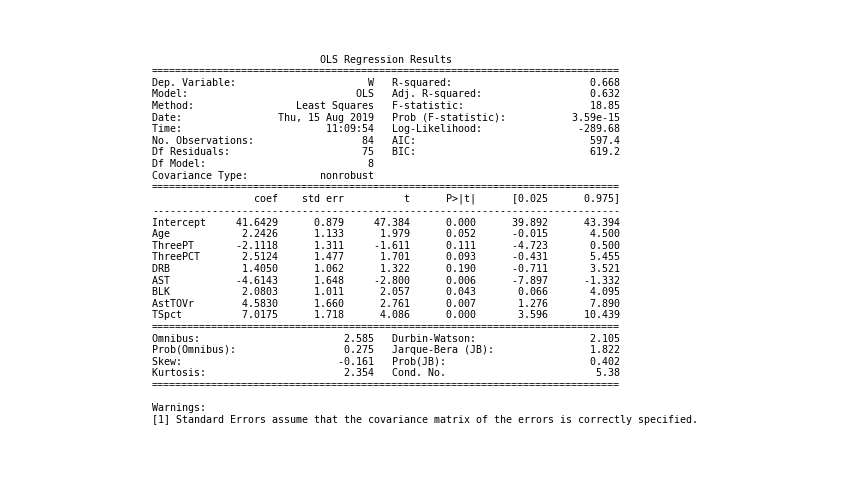

In [17]:
# save OLS_lm summary as a figure
plt.rc('figure', figsize=(12,7))
plt.text(0.15,0.08, str(OLS_lm.summary()), {'fontsize':75}, fontproperties='monospace')
plt.axis('off')
plt.tight_layout()

# plt.savefig('OLS_lm1.png')

**Hypothesis Test**
- **Null Hypothesis:** There is ***no*** relationship between the statistics &mdash; Age, ThreePT, ThreePCT, DRB, AST, BLK, AstTOVr, TSpct &mdash; and Wins.
    - &beta;<sub>n</sub> equals zero
- **Alternate Hypothesis:** There ***is*** a relationship between the statistics and Wins.
    - &beta;<sub>n</sub> *is not* equal to zero

**Testing Hypothesis**
- **Reject the null hypothesis:**
    - There *is* a relationship between the statistics &mdash; Age, ThreePT, ThreePCT, DRB, AST, BLK, AstTOVr, TSpct &mdash; and Wins.
    - If the 95% confidence interval ***does not*** include a zero
- **Fail to reject the null hypothesis:**
    - There is **no** relationship between the statistics
    - If the 95% confidence interval ***includes*** a zero

Take a look at the 95% confidence interval for each &beta;<sub>1</sub>, &beta;<sub>2</sub>, ... ,&beta;<sub>n</sub> value.

In [18]:
# check confidence interval
OLS_lm.conf_int()

,0,1
Intercept,39.892130,43.393585
Age,-0.015111,4.500214
ThreePT,-4.723276,0.499739
ThreePCT,-0.430712,5.455442
DRB,-0.711406,3.521318
AST,-7.896932,-1.331703
BLK,0.065970,4.094617
AstTOVr,1.276047,7.889891
TSpct,3.595855,10.439161


Text(0.5, 1.0, 'Confidence Interval')

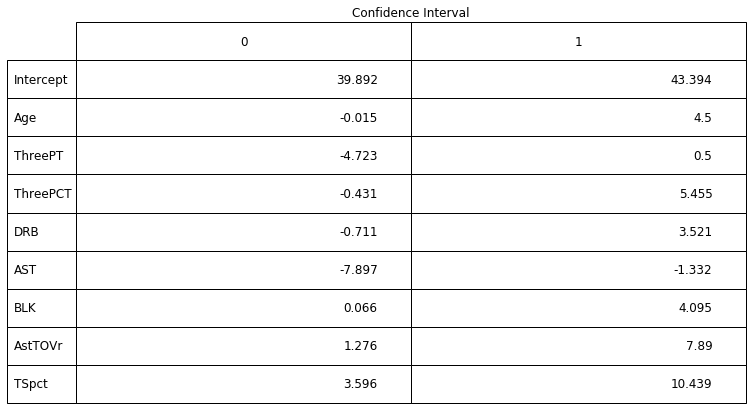

In [19]:
# save OLS_lm confidence interval as a figure
axt1 = plt.subplot(frame_on=False)
axt1.xaxis.set_visible(False)
axt1.yaxis.set_visible(False)
OLS_conf1_tb = tb(axt1, OLS_lm.conf_int().round(3), loc='center', bbox=[0,0,1,1])
OLS_conf1_tb.auto_set_font_size(False)
OLS_conf1_tb.set_fontsize(12)

plt.title('Confidence Interval', loc='center')

# plt.savefig('OLS_lm_conf1.png')

Looking at the confidence interval (above), we can see that Age, ThreePT, ThreePCT, DRB include a zero in their respective confidence interval.

**Take a look at the p-value**
- p-value < 0.05 are significant
    - Reject the null
    - There ***is*** a relationship
- p-value > 0.05 are not significant
    - Fail to reject the null
    - There is ***no*** relationship

In [20]:
# check p-value
print(OLS_lm.pvalues)

Intercept    1.194164e-57
Age          5.151381e-02
ThreePT      1.114040e-01
ThreePCT     9.316845e-02
DRB          1.900319e-01
AST          6.490116e-03
BLK          4.312980e-02
AstTOVr      7.244793e-03
TSpct        1.090694e-04
dtype: float64


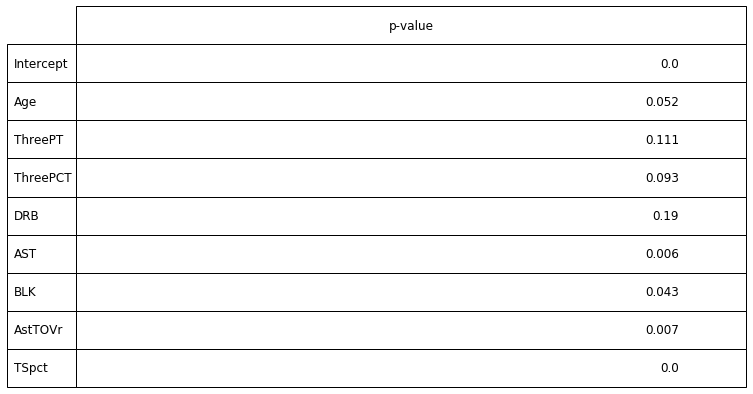

In [21]:
# save OLS_lm p-value as a figure
axp1 = plt.subplot(frame_on=False)
axp1.xaxis.set_visible(False)
axp1.yaxis.set_visible(False)
OLS_pval1_tb = tb(axp1, OLS_lm.pvalues.round(3), loc='center', bbox=[0.1,0,1,1], colLabels=['p-value'])
OLS_pval1_tb.auto_set_font_size(False)
OLS_pval1_tb.set_fontsize(12)

# plt.savefig('OLS_lm_pval1.png')

Looking at the p-value for each statistic (above), we can see that Age, ThreePT, ThreePCT, DRB have a p-value greater than 0.05.

Based on the information provided by the confidence interval and p-value for each statistic:
- Age, ThreePT, ThreePCT, DRB each have a zero in their respective confidence interval
- Age, ThreePT, ThreePCT, DRB each have a p-value > 0.05

Take a look at how well the model predicts the "unseen" out-of-sample test set.
- calculate **R-squared (R2)** and **Root Mean Square Error (RMSE)** to evaluate model prediction

In [22]:
# generate predicted values using OLS model
OLS_pred_val = OLS_lm.predict(test_model_df)

# calculate residual (i.e. errors) values between true and predicted values
OLS_lm_resid = y_test-OLS_pred_val

In [23]:
# calculate Sum of Squared Residuals (SSR) or Sum of Squared Errors (SSE)
# measures discrepancy between data and model's predicted values; sum of squared errors of regression model
OLS_SSE = sum(OLS_lm_resid**2)

In [24]:
# calculate Total Sum of Squares (TSS or SST)
# measures discrepancy between data and baseline model's predicted values (i.e. mean); sum of squared errors of baseline model
OLS_SST = sum((np.mean(y_train)-y_test)**2)

In [25]:
# calculate R-squared to measure "goodness of fit"; how much variance in the response data does the model account for
OLS_R2 = 1-(OLS_SSE/OLS_SST)
print(OLS_R2)

0.46014369914588105


In [26]:
# calculate Root Mean Squared Error (RMSE) to measure standard deviation of residuals (i.e. prediction errors)
OLS_RMSE = np.sqrt(OLS_SSE/len(y_test))
print(OLS_RMSE)

7.94026509304813


To see if we can improve on the model, let's refit the model by removing DRB since it has a zero in its confidence interval and the highest p-value, 0.19.

**Fit second OLS model with removal of DRB from features**

In [27]:
# fit second OLS regression model to data; remove DRB from features
OLS_lm2 = smf.ols(formula='W ~ Age + ThreePT + ThreePCT + AST + BLK + AstTOVr + TSpct', data=train_model_df).fit()

In [28]:
# check summary of model
OLS_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     21.08
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           1.71e-15
Time:                        11:10:15   Log-Likelihood:                -290.64
No. Observations:                  84   AIC:                             597.3
Df Residuals:                      76   BIC:                             616.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6429      0.883     47.152      0.000      39.884      43.402
Age            2.2204      1.139      1.950      0.055      -0.048       4.488
ThreePT       -1.5478      1.246     -1.243      0.218      -4.029       0.933
ThreePCT       2.5636      1.484      1.727      0.088      -0.392       5.519
AST           -4.6858      1.655     -2.831      0.006      -7.982      -1.390
BLK            2.5230      0.959      2.631      0.010       0.613       4.433
AstTOVr        4.8379      1.657      2.920      0.005       1.538       8.138
TSpct          6.9581      1.725      4.033      0.000       3.522      10.395
==============================================================================
Omnibus:                        1.285   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                1.180
Skew:                          -0.134   Prob(JB):                        0.554
Kurtosis:                       2.485   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

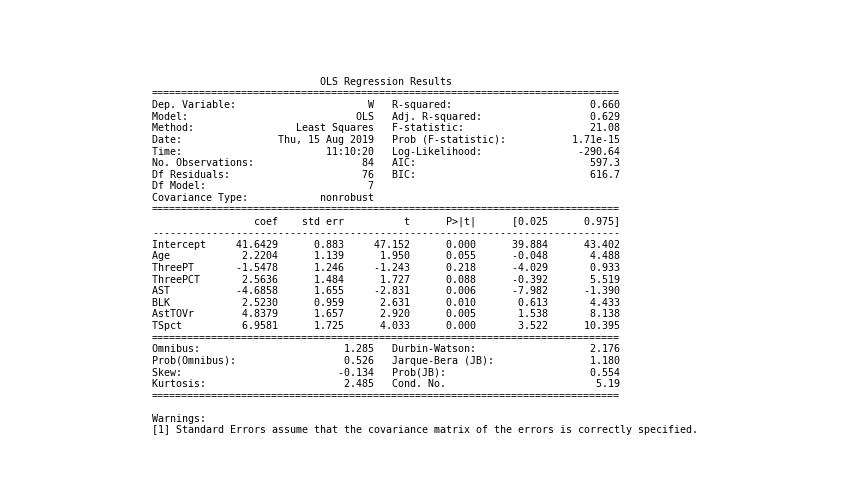

In [29]:
# save OLS_lm2 summary as a figure
plt.rc('figure', figsize=(12,7))
plt.text(0.15,0.08, str(OLS_lm2.summary()), {'fontsize':75}, fontproperties='monospace')
plt.axis('off')
plt.tight_layout()

# plt.savefig('OLS_lm2.png')

In [30]:
# check confidence interval
OLS_lm2.conf_int()

,0,1
Intercept,39.883904,43.401810
Age,-0.047594,4.488451
ThreePT,-4.028938,0.933245
ThreePCT,-0.392319,5.519459
AST,-7.982098,-1.389577
BLK,0.613361,4.432669
AstTOVr,1.537908,8.137874
TSpct,3.521563,10.394670


Text(0.5, 1.0, 'Confidence Interval')

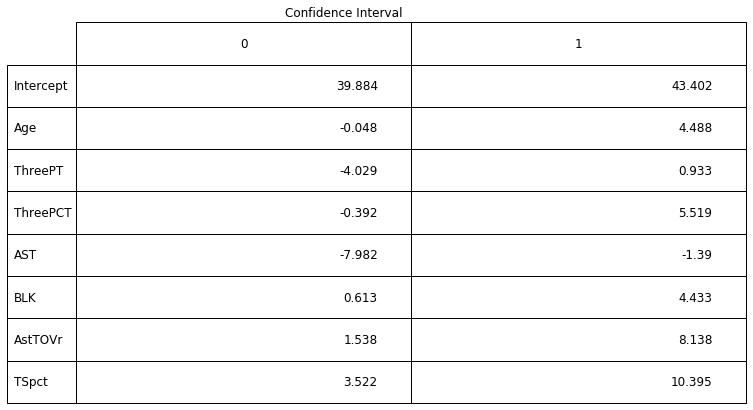

In [31]:
# save OLS_lm2 confidence interval as a figure
axt2 = plt.subplot(frame_on=False)
axt2.xaxis.set_visible(False)
axt2.yaxis.set_visible(False)
OLS_conf2_tb = tb(axt2, OLS_lm2.conf_int().round(3), loc='center', bbox=[0.1,0,1,1])
OLS_conf2_tb.auto_set_font_size(False)
OLS_conf2_tb.set_fontsize(12)

plt.title('Confidence Interval', loc='center')

# plt.savefig('OLS_lm_conf2.png')

In [32]:
# check p-value
print(OLS_lm2.pvalues)

Intercept    4.978669e-58
Age          5.487924e-02
ThreePT      2.178653e-01
ThreePCT     8.817073e-02
AST          5.930091e-03
BLK          1.029268e-02
AstTOVr      4.606255e-03
TSpct        1.300379e-04
dtype: float64


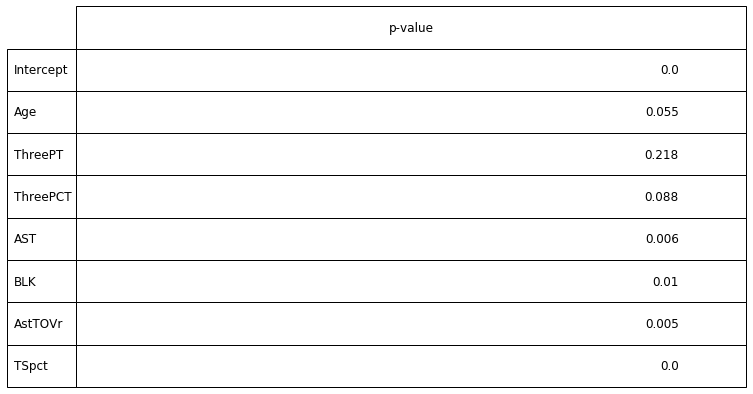

In [33]:
# save OLS_lm2 p-value as a figure
axp2 = plt.subplot(frame_on=False)
axp2.xaxis.set_visible(False)
axp2.yaxis.set_visible(False)
OLS_pval2_tb = tb(axp2, OLS_lm2.pvalues.round(3), loc='center', bbox=[0.1,0,1,1], colLabels=['p-value'])
OLS_pval2_tb.auto_set_font_size(False)
OLS_pval2_tb.set_fontsize(12)

# plt.savefig('OLS_lm_pval2.png')

Taking a look at the summary, confidence interval, p-value of the second OLS model, we can see the following:

**Confidence interval:**
- Age, ThreePT, ThreePCT have a confidence interval which includes a zero

**p-value:**
- Age, ThreePT, ThreePCT have a p-value > 0.05

Take a look at how well the second model predicts the "unseen" out-of-sample test set.
- calculate **R-squared (R2)** and **Root Mean Square Error (RMSE)** to evaluate model prediction

In [34]:
# generate predicted values using second OLS model
OLS_pred_val2 = OLS_lm2.predict(test_model_df)

# calculate residual (i.e. errors) values between true and predicted values
OLS_lm_resid2 = y_test-OLS_pred_val2

In [35]:
# calculate Sum of Squared Residuals (SSR) or Sum of Squared Errors (SSE)
# measures discrepancy between data and model's predicted values; sum of squared errors of regression model
OLS_SSE2 = sum(OLS_lm_resid2**2)

In [36]:
# calculate R-squared to measure "goodness of fit"; how much variance in the response data does the model account for
OLS2_R2 = 1-(OLS_SSE2/OLS_SST)
print(OLS2_R2)

0.4123766214485727


In [37]:
# calculate Root Mean Squared Error (RMSE) to measure standard deviation of residuals (i.e. prediction errors)
OLS_RMSE2 = np.sqrt(OLS_SSE2/len(y_test))
print(OLS_RMSE2)

8.284102191242104


To see if we can improve on the model, let's refit the model by removing ThreePT since it has a zero in its confidence interval and the highest p-value, 0.218.

**Fit third OLS model with removal of ThreePT from features**

In [38]:
# fit third OLS regression model to data; remove ThreePT from features
OLS_lm3 = smf.ols(formula='W ~ Age + ThreePCT + AST + BLK + AstTOVr + TSpct', data=train_model_df).fit()

In [39]:
# check summary of model
OLS_lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     24.17
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           6.92e-16
Time:                        11:10:32   Log-Likelihood:                -291.49
No. Observations:                  84   AIC:                             597.0
Df Residuals:                      77   BIC:                             614.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6429      0.886     46.987      0.000      39.878      43.408
Age            2.4927      1.121      2.223      0.029       0.260       4.726
ThreePCT       2.3135      1.476      1.568      0.121      -0.625       5.252
AST           -4.8867      1.653     -2.956      0.004      -8.178      -1.595
BLK            2.7563      0.944      2.921      0.005       0.877       4.635
AstTOVr        4.9957      1.658      3.013      0.003       1.695       8.297
TSpct          6.0115      1.554      3.869      0.000       2.918       9.105
==============================================================================
Omnibus:                        0.810   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.892
Skew:                          -0.218   Prob(JB):                        0.640
Kurtosis:                       2.745   Cond. No.                         4.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

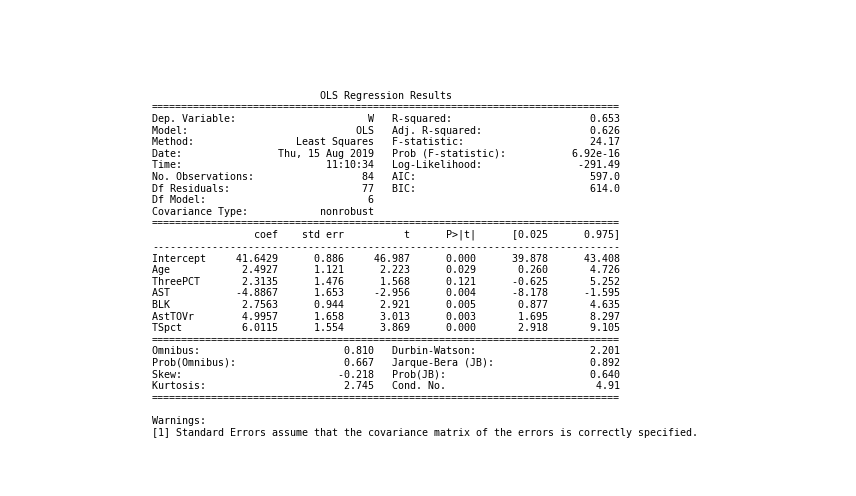

In [40]:
# save OLS_lm3 summary as a figure
plt.rc('figure', figsize=(12,7))
plt.text(0.15,0.08, str(OLS_lm3.summary()), {'fontsize':75}, fontproperties='monospace')
plt.axis('off')
plt.tight_layout()

# plt.savefig('OLS_lm3.png')

In [41]:
# check confidence interval
OLS_lm3.conf_int()

,0,1
Intercept,39.878074,43.407640
Age,0.259710,4.725724
ThreePCT,-0.624798,5.251779
AST,-8.178090,-1.595353
BLK,0.877440,4.635208
AstTOVr,1.694534,8.296889
TSpct,2.917847,9.105084


Text(0.5, 1.0, 'Confidence Interval')

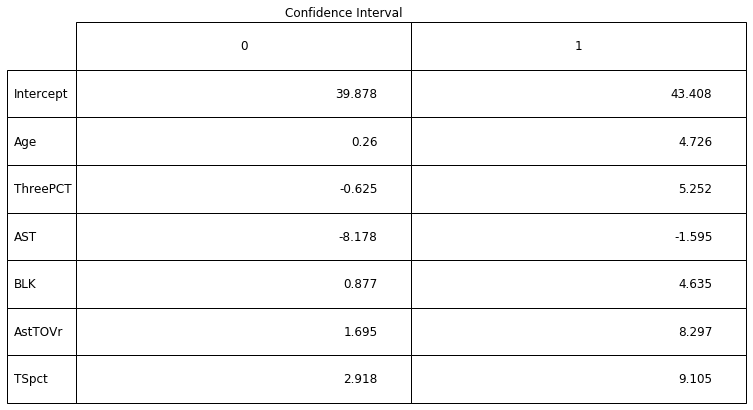

In [42]:
# save OLS_lm3 confidence interval as a figure
axt3 = plt.subplot(frame_on=False)
axt3.xaxis.set_visible(False)
axt3.yaxis.set_visible(False)
OLS_conf3_tb = tb(axt3, OLS_lm3.conf_int().round(3), loc='center', bbox=[0.1,0,1,1])
OLS_conf3_tb.auto_set_font_size(False)
OLS_conf3_tb.set_fontsize(12)

plt.title('Confidence Interval', loc='center')

# plt.savefig('OLS_lm_conf3.png')

In [43]:
# check p-value
print(OLS_lm3.pvalues)

Intercept    1.901383e-58
Age          2.915982e-02
ThreePCT     1.210206e-01
AST          4.129638e-03
BLK          4.573637e-03
AstTOVr      3.495817e-03
TSpct        2.269031e-04
dtype: float64


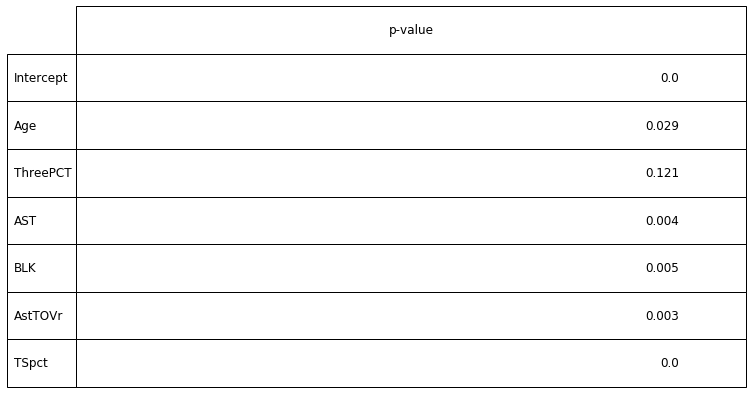

In [44]:
# save OLS_lm3 p-value as a figure
axp3 = plt.subplot(frame_on=False)
axp3.xaxis.set_visible(False)
axp3.yaxis.set_visible(False)
OLS_pval3_tb = tb(axp3, OLS_lm3.pvalues.round(3), loc='center', bbox=[0.1,0,1,1], colLabels=['p-value'])
OLS_pval3_tb.auto_set_font_size(False)
OLS_pval3_tb.set_fontsize(12)

# plt.savefig('OLS_lm_pval3.png')

Taking a look at the summary, confidence interval, p-value of the third OLS model, we can see the following:

**Confidence interval:**
- ThreePCT has a confidence interval which includes a zero

**p-value:**
- ThreePCT has a p-value > 0.05 

Take a look at how well the third model predicts the "unseen" out-of-sample test set.
- calculate **R-squared (R2)** and **Root Mean Square Error (RMSE)** to evaluate model prediction

In [45]:
# generate predicted values using third OLS model
OLS_pred_val3 = OLS_lm3.predict(test_model_df)

# calculate residual (i.e. errors) values between true and predicted values
OLS_lm_resid3 = y_test-OLS_pred_val3

In [46]:
# calculate Sum of Squared Residuals (SSR) or Sum of Squared Errors (SSE)
# measures discrepancy between data and model's predicted values; sum of squared errors of regression model
OLS_SSE3 = sum(OLS_lm_resid3**2)

In [47]:
# calculate R-squared to measure "goodness of fit"; how much variance in the response data does the model account for
OLS3_R2 = 1-(OLS_SSE3/OLS_SST)
print(OLS3_R2)

0.4373785151125201


In [48]:
# calculate Root Mean Squared Error (RMSE) to measure standard deviation of residuals (i.e. prediction errors)
OLS_RMSE3 = np.sqrt(OLS_SSE3/len(y_test))
print(OLS_RMSE3)

8.105952808368277


To see if we can improve on the model, let's refit the model by removing ThreePCT since it has a zero in its confidence interval and the highest p-value, 0.121.

**Fit fourth OLS model with removal of ThreePCT from features**

In [49]:
# fit third OLS regression model to data; remove AST from features
OLS_lm4 = smf.ols(formula='W ~ Age + AST + BLK + AstTOVr + TSpct', data=train_model_df).fit()

In [50]:
# check summary of model
OLS_lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     27.98
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           4.00e-16
Time:                        11:10:45   Log-Likelihood:                -292.81
No. Observations:                  84   AIC:                             597.6
Df Residuals:                      78   BIC:                             612.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6429      0.895     46.554      0.000      39.862      43.424
Age            2.3744      1.129      2.103      0.039       0.126       4.623
AST           -5.0187      1.666     -3.012      0.003      -8.336      -1.702
BLK            2.8970      0.948      3.056      0.003       1.010       4.784
AstTOVr        5.6837      1.614      3.522      0.001       2.471       8.896
TSpct          7.5158      1.233      6.094      0.000       5.061       9.971
==============================================================================
Omnibus:                        0.782   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.890
Skew:                          -0.155   Prob(JB):                        0.641
Kurtosis:                       2.603   Cond. No.                         4.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

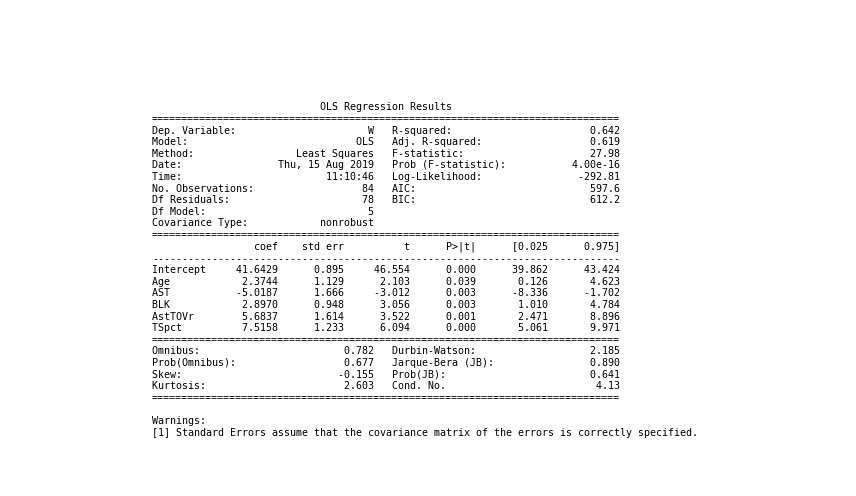

In [51]:
# save OLS_lm4 summary as a figure
plt.rc('figure', figsize=(12,7))
plt.text(0.15,0.08, str(OLS_lm4.summary()), {'fontsize':75}, fontproperties='monospace')
plt.axis('off')
plt.tight_layout()

# plt.savefig('OLS_lm4.png')

In [52]:
# check confidence interval
OLS_lm4.conf_int()

,0,1
Intercept,39.862020,43.423695
Age,0.126201,4.622630
AST,-8.335671,-1.701666
BLK,1.009661,4.784420
AstTOVr,2.471271,8.896080
TSpct,5.060631,9.971051


Text(0.5, 1.0, 'Confidence Interval')

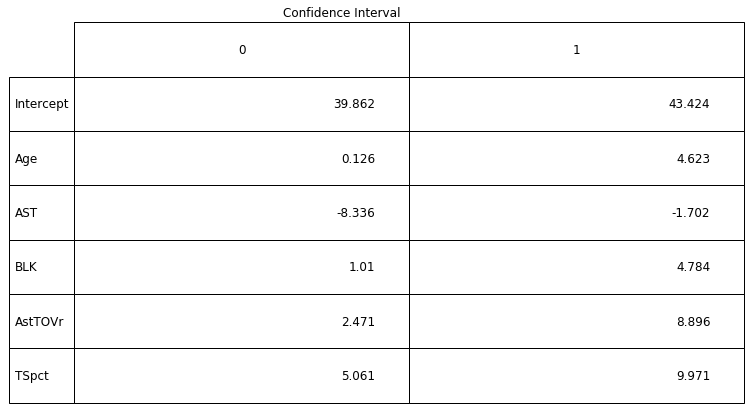

In [53]:
# save OLS_lm4 confidence interval as a figure
axt4 = plt.subplot(frame_on=False)
axt4.xaxis.set_visible(False)
axt4.yaxis.set_visible(False)
OLS_conf4_tb = tb(axt4, OLS_lm4.conf_int().round(3), loc='center', bbox=[0.1,0,1,1])
OLS_conf4_tb.auto_set_font_size(False)
OLS_conf4_tb.set_fontsize(12)

plt.title('Confidence Interval', loc='center')

# plt.savefig('OLS_lm_conf4.png')

In [54]:
# check p-value
OLS_lm4.pvalues

Intercept    1.133389e-58
Age          3.872620e-02
AST          3.495664e-03
BLK          3.071653e-03
AstTOVr      7.182875e-04
TSpct        3.918829e-08
dtype: float64

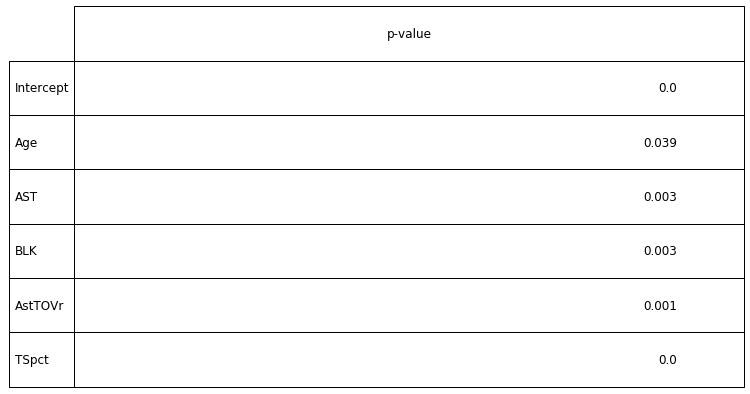

In [55]:
# save OLS_lm4 p-value as a figure
axp4 = plt.subplot(frame_on=False)
axp4.xaxis.set_visible(False)
axp4.yaxis.set_visible(False)
OLS_pval4_tb = tb(axp4, OLS_lm4.pvalues.round(3), loc='center', bbox=[0.1,0,1,1], colLabels=['p-value'])
OLS_pval4_tb.auto_set_font_size(False)
OLS_pval4_tb.set_fontsize(12)

# plt.savefig('OLS_lm_pval4.png')

Taking a look at the summary, confidence interval, p-value of the fourth OLS model, we can see the following:

**Confidence interval:**
- The remaining features &mdash; Age, AST, BLK, AstTOVr, TSpct &mdash; ***do not*** have a zero

**p-value:**
- The remaining features &mdash; Age, AST, BLK, AstTOVr, TSpct &mdash; have a p-value < 0.05

Interpreting the results from the fourth OLS model, we can ***reject the null hypothesis***; based on the information from the confidence interval and p-value, we can believe that there is a relationship between these statistics &mdash; Age, AST, BLK, AstTOVr, TSpct &mdash; and Wins.

Take a look at how well the fourth model predicts the "unseen" out-of-sample test set.
- calculate **R-squared (R2)** and **Root Mean Square Error (RMSE)** to evaluate model prediction

In [56]:
# generate predicted values using fourth OLS model
OLS_pred_val4 = OLS_lm4.predict(test_model_df)

# calculate residual (i.e. errors) values between true and predicted values
OLS_lm_resid4 = y_test-OLS_pred_val4

In [57]:
# calculate Sum of Squared Residuals (SSR) or Sum of Squared Errors (SSE)
# measures discrepancy between data and model's predicted values; sum of squared errors of regression model
OLS_SSE4 = sum(OLS_lm_resid4**2)

In [58]:
# calculate R-squared to measure "goodness of fit"; how much variance in the response data does the model account for
OLS4_R2 = 1-(OLS_SSE4/OLS_SST)
print(OLS4_R2)

0.44973877552207664


In [59]:
# calculate Root Mean Squared Error (RMSE) to measure standard deviation of residuals (i.e. prediction errors)
OLS_RMSE4 = np.sqrt(OLS_SSE4/len(y_test))
print(OLS_RMSE4)

8.016418282740473


**Using the Scikit-Learn linear regression algorithm, build a regression model utilizing selected features for 2019 prediction.**

In [60]:
# using features selected from the final OLS_model_data data frame, create X matrix & y vector data to perform sklearn linear regression
# features: Age, AST, BLK, AstTOVr, TSpct

# X & y for model training
X = train_model_df[['Age', 'AST', 'BLK', 'AstTOVr', 'TSpct']]
y = train_model_df['W']

# X for model testing
X_test2 = test_model_df[['Age', 'AST', 'BLK', 'AstTOVr', 'TSpct']]

In [61]:
# create an instance of LinearRegression object & train model
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
# create table to view coefficient values
coeff_df = pd.DataFrame(data=lm.coef_, index=['Age', 'AST', 'BLK', 'AstTOVr', 'TSpct'], columns=['Coefficient'])
coeff_df 

,Coefficient
Age,2.374416
AST,-5.018668
BLK,2.897041
AstTOVr,5.683676
TSpct,7.515841


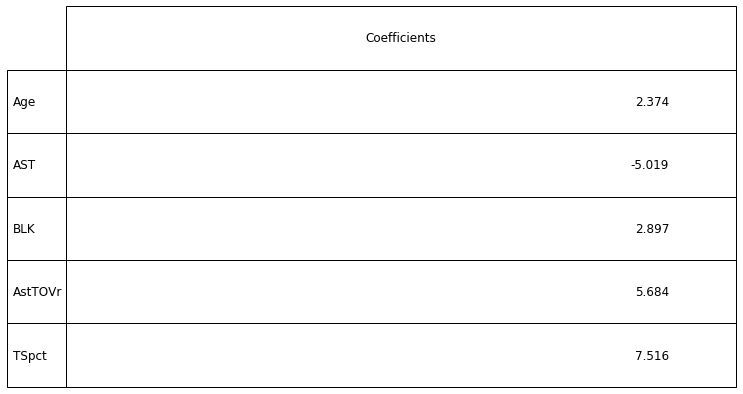

In [63]:
# save Scikit-Learn lm coefficients as a figure
axcoef = plt.subplot(frame_on=False)
axcoef.xaxis.set_visible(False)
axcoef.yaxis.set_visible(False)
lm_coef_tb = tb(axcoef, coeff_df.round(3), loc='center', bbox=[0,0,1,1], colLabels=['Coefficients'])
lm_coef_tb.auto_set_font_size(False)
lm_coef_tb.set_fontsize(12)

# plt.savefig('Scikit_lm_coeff.png')

In [64]:
# generate prediction values
y_pred = lm.predict(X_test2)

In [65]:
# create table to view actual vs predicted values
actual_v_pred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
actual_v_pred.head()

,Actual,Predicted
17,36,52.925331
86,47,53.743958
68,17,25.945333
27,51,55.641300
84,41,27.063681


In [66]:
# calculate Root Mean Squared Error to measure standard deviation of residuals (i.e. prediction errors)
lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(lm_RMSE)

8.016418282740476


Root Mean Squared Error (RMSE) value is 8.02 (~8); the fitted regression line has an approximate deviation of ~8 wins.

In [67]:
# calculate R-squared to measure "goodness of fit"; how close the data are to the regression line 
lm_R2 = lm.score(X_test2,y_test) # can also use metrics.r2_score(y_test, y_pred)
print(lm_R2)

0.42721796607605655


R-squared value shows that the fitted regression line accounts for 42.72% of the variance in the response data.

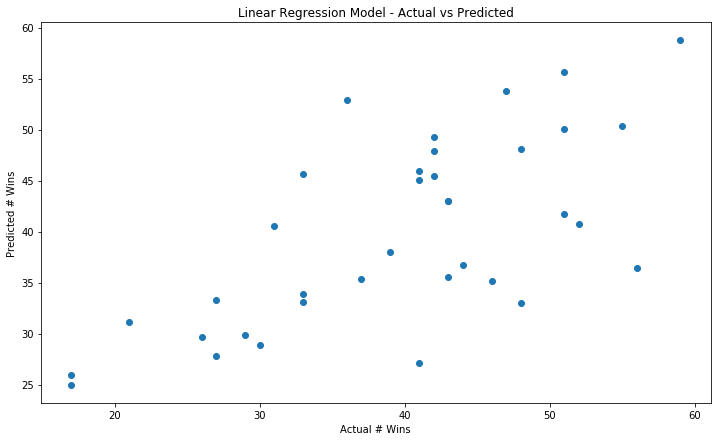

In [68]:
# visualize actual values vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual # Wins')
plt.ylabel('Predicted # Wins')
plt.title('Linear Regression Model - Actual vs Predicted')
plt.show()

**Let's see how well the model can predict season performance in the 2019 NBA season.**

In [69]:
# Using linear regression model with features Age, AST, BLK, AstTOVr, TSpct 
pred_X_data = pred_model_data[['Age', 'ThreePT', 'ThreePCT', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TSpct']]
pred_y_data = pred_model_data['W']

In [70]:
# standardize 2019 X data for selected model prediction; utilize scale parameters performed on training data
stand_X_pred = scaler.transform(pred_X_data.values)

In [71]:
# convert standardized pred_X_data to data frame; should have matrix shape same as selected linear model to predict values
pred_model_df = pd.DataFrame(stand_X_pred, index=pred_X_data.index, columns=['Age', 'ThreePT', 'ThreePCT', 'DRB', 'AST', 'BLK', 'AstTOVr', 'TSpct'])

Predict 2019 season performance with Scikit-Learn linear model features &mdash; Age, AST, BLK, AstTOVr, TSpct.

In [72]:
# create variable holding selected features
pred_X = pred_model_df[['Age','AST','BLK','AstTOVr','TSpct']]

In [73]:
# generate predicted values
lm_pred_val = lm.predict(pred_X)

In [74]:
# calculate Root Mean Squared Error to measure standard deviation of residuals (i.e. prediction errors)
pred_RMSE = np.sqrt(metrics.mean_squared_error(pred_y_data, lm_pred_val))
print(pred_RMSE)

9.087225144216074


Root Mean Squared Error (RMSE) value is 9.08 (~9); the fitted regression line has an approximate deviation of ~9 wins.

In [75]:
# calculate R-squared to measure "goodness of fit"; how close the data are to the regression line 
pred_R2 = lm.score(pred_X,pred_y_data) # can also use metrics.r2_score(y_test, y_pred)
print(pred_R2)

0.4095972772521007


R-squared value shows that the fitted regression line accounts for 40.95% of the variance in the response data.

**Create a graph to visualize 2019 predicted values in comparison to actual**

To create the graphs:
- Adjust data frame with standardized values to include Tm, W, Predicted Wins columns
- Establish Western and Eastern Conference NBA teams for playoff prediction evaluation

In [76]:
# Add-in columns for Tm, W, Predicted to data frame with scaled values
pred_model_df.insert(0, 'Tm', pred_model_data['Tm'].values, True)
pred_model_df.insert(1, 'W', pred_y_data, True)
pred_model_df.insert(2, 'Predicted_W', lm_pred_val, True)

#take a look at data frame head
pred_model_df.head()

,Tm,W,Predicted_W,Age,ThreePT,ThreePCT,DRB,AST,BLK,AstTOVr,TSpct
0,ATL,29,33.902926,-0.850578,2.108390,-0.158266,0.832303,1.474021,0.223145,-0.401918,0.441099
5,BOS,49,55.328324,-0.533967,1.878333,0.574049,1.043336,1.677986,0.468568,2.519352,1.024229
10,BRK,42,37.536973,-0.692273,1.976929,-0.101934,1.658849,0.569960,-1.003970,-0.046343,0.475029
15,CHO,39,52.624590,-0.059050,1.516814,-0.214598,0.419030,0.299844,0.008400,1.721602,0.374861
20,CHI,22,34.150517,-1.431032,-0.008138,-0.214598,0.603684,-0.301026,-0.819903,-0.218063,-0.264844


In [77]:
# create lists for western and eastern conferences 
west_conf = ['DAL','DEN','GSW','HOU','LAC','LAL','MEM','MIN','NOP','OKC','PHO','POR','SAC','SAS','UTA']
east_conf = ['ATL','BOS','BRK','CHO','CHI','CLE', 'DET','IND','MIA','MIL','NYK','ORL','PHI','TOR','WAS']

In [78]:
# create lists with team name, actual win values, predicted win values for each conference
west_list = []
east_list = []

for i in west_conf:
    for e, team in enumerate(pred_model_df['Tm']):
        if i == team:
            west_list.append([pred_model_df['Tm'].iloc[e], pred_model_df['W'].iloc[e], pred_model_df['Predicted_W'].iloc[e]])

for i in east_conf:
    for e, team in enumerate(pred_model_df['Tm']):
        if i == team:
            east_list.append([pred_model_df['Tm'].iloc[e], pred_model_df['W'].iloc[e], pred_model_df['Predicted_W'].iloc[e]])

In [79]:
# sort each conference actual wins and predicted wins descending from greatest to lowest; will be used to determine playoff teams
west_W_sorted = []
east_W_sorted = []

west_P_sorted = []
east_P_sorted = []

# sort lists by actual wins
west_W_sorted = sorted(west_list, key=lambda x:x[1], reverse=True)
east_W_sorted = sorted(east_list, key=lambda x:x[1], reverse=True)

# sort lists by predicted wins
west_P_sorted = sorted(west_list, key=lambda x:x[2], reverse=True)
east_P_sorted = sorted(east_list, key=lambda x:x[2], reverse=True)

In [80]:
# determine which teams made it into the playoffs for actual & predicted values in each conference
# only 8 teams from each conference qualify for the playoffs based on their win records in their respective conference
west_playoffs_actual = []
east_playoffs_actual = []
west_playoffs_pred = []
east_playoffs_pred = []

# append teams from actual wins that place into playoffs
for i, team in enumerate(west_W_sorted):
    if west_W_sorted[i][1] >= west_W_sorted[7][1]:
        west_playoffs_actual.append(team)

for i, team in enumerate(east_W_sorted):        
    if east_W_sorted[i][1] >= east_W_sorted[7][1]:
        east_playoffs_actual.append(team)

# append teams from predicted wins that place into playoffs
for i, team in enumerate(west_P_sorted):
    if west_P_sorted[i][2] >= west_P_sorted[7][2]:
        west_playoffs_pred.append(team)

for i, team in enumerate(east_P_sorted):
    if east_P_sorted[i][2] >= east_P_sorted[7][2]:
        east_playoffs_pred.append(team)

In [81]:
# determine whether predictions were correct or incorrect in evaluating ability to qualify for playoffs
west_corr = []
east_corr = []
west_incorr = []
east_incorr = []

# append western conference teams from predictions into lists identifying correctly or incorrectly predicted
for i, team in enumerate(west_playoffs_pred):
    count = 0 # utilize counter to identify teams that do not match with any team in actual playoff list 
    for e, team2 in enumerate(west_playoffs_actual):
        if team[0] == team2[0]: # boolean check whether predicted playoff team matches with any team in actual playoff team list
            west_corr.append(team) 
        elif team[0] != team2[0]:
            count += 1
            if count == 8:
                west_incorr.append(team)
                
# append eastern conference teams from predictions into lists identifying correctly or incorrectly predicted
for i, team in enumerate(east_playoffs_pred):
    count = 0 # utilize counter to identify teams that do not match with any team in actual playoff list 
    for e, team2 in enumerate(east_playoffs_actual):
        if team[0] == team2[0]: # boolean check whether predicted playoff team matches with any team in actual playoff team list
            east_corr.append(team) 
        elif team[0] != team2[0]:
            count += 1
            if count == 8:
                east_incorr.append(team)

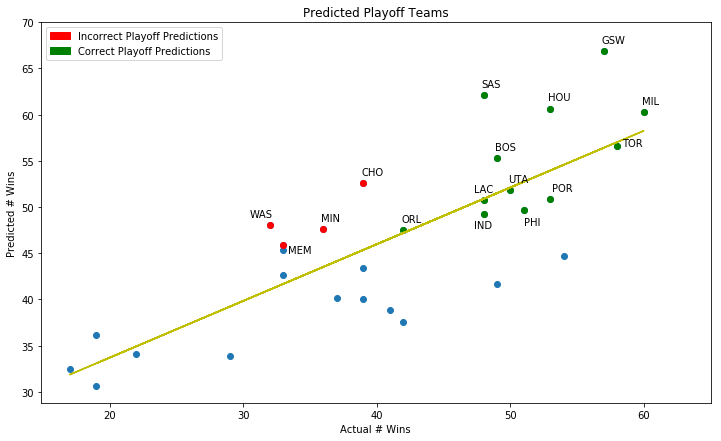

In [82]:
# create graph to help visualize actual vs predicted values; correct vs incorrect playoff predictions

# plot data to graph
plt.scatter(pred_y_data, lm_pred_val) # actual vs predicted win values
plt.plot([e for i,e,f in east_incorr], [f for i,e,f in east_incorr], 'ro') # incorrect east playoff predictions
plt.plot([e for i,e,f in west_incorr], [f for i,e,f in west_incorr], 'ro') # incorrect west playoff predictions
plt.plot([e for i,e,f in east_corr], [f for i,e,f in east_corr], 'go') # correct east playoff predictions
plt.plot([e for i,e,f in west_corr], [f for i,e,f in west_corr], 'go') # correct west playoff predictions

# generate "y=mx+b" values to plot best-fit line
y_slope, y_int = np.polyfit(pred_y_data, lm_pred_val, 1)
plt.plot(pred_y_data, y_slope*pred_y_data+y_int, '-y')

# annotate team labels for predicted playoff teams to graph; adjust location of label as needed
for label, x, y in east_incorr:
    if label == 'WAS':
        plt.annotate(s=label, xy=(x,y), xytext=(-20,8), textcoords='offset points')
    else:
        plt.annotate(s=label, xy=(x,y), xytext=(-2,8), textcoords='offset points')
for label, x, y in west_incorr:
    if label == 'MEM':
        plt.annotate(s=label, xy=(x,y), xytext=(5,-8), textcoords='offset points')
    else:
        plt.annotate(s=label, xy=(x,y), xytext=(-2,8), textcoords='offset points')
for label, x, y in east_corr:
    if label == 'TOR':
        plt.annotate(s=label, xy=(x,y), xytext=(5,0), textcoords='offset points')
    elif label == 'IND':
        plt.annotate(s=label, xy=(x,y), xytext=(-10,-15), textcoords='offset points')
    elif label == 'PHI':
        plt.annotate(s=label, xy=(x,y), xytext=(0,-15), textcoords='offset points')
    else:
        plt.annotate(s=label, xy=(x,y), xytext=(-2,8), textcoords='offset points')
for label, x, y in west_corr:
    if label == 'LAC':
        plt.annotate(s=label, xy=(x,y), xytext=(-10,8), textcoords='offset points')
    elif label == 'POR':
        plt.annotate(s=label, xy=(x,y), xytext=(2,8), textcoords='offset points')
    else:
        plt.annotate(s=label, xy=(x,y), xytext=(-2,8), textcoords='offset points')

plt.xlabel('Actual # Wins')
plt.ylabel('Predicted # Wins')
plt.title('Predicted Playoff Teams')
        
# adjust graph paramaters
plt.xlim(right=65)
plt.ylim(top=70)

# create legend
pred_incorr = mpatches.Patch(color='red', label='Incorrect Playoff Predictions')
pred_corr = mpatches.Patch(color='green', label='Correct Playoff Predictions')

plt.legend(loc='upper left', handles=[pred_incorr, pred_corr])

plt.show()

# plt.savefig('scatter_pred_18-19.png')

From the graph above, we can see that there are 4 teams that the linear model did not correctly predict the results of season performance and making it into the playoffs.

Incorrectly predicted teams: Charlotte Hornets (CHO), Washington Wizards (WAS), Minnesota Timberwolves (MIN), Memphis Grizzlies (MEM).

**Create a table for each conference to help identify incorrectly predicted playoff teams vs actual playoff teams**

 Observations of tables:
- Season performance (wins) results of actual vs. predicted playoff teams
- Which teams were the actual playoff teams in relation to the incorrectly predicted playoff teams

In [83]:
# import imgkit tool for html to other file type (e.g. png, pdf, etc.) conversion
import imgkit

In [84]:
# create path to wkhtmltopdf tool so that imgkit tool can convert html object
path_wkhtmltoimage = r'C:\Users\aliu4\Programs\Anaconda3\wkhtmltopdf\bin\wkhtmltoimage.exe'
config_img = imgkit.config(wkhtmltoimage=path_wkhtmltoimage)

**West playoffs teams**

In [85]:
# create western conference teams data frame table
west_df = pd.merge(pd.DataFrame(west_playoffs_actual, columns=['West_Tm_Actual', 'West_Actual_W', 'Predicted_W']).drop('Predicted_W', axis=1), 
pd.DataFrame(west_playoffs_pred, columns=['West_Tm_Pred', 'Actual_W', 'West_Pred_W']).drop('Actual_W', axis=1), left_index=True, right_index=True)

In [86]:
# round predicted values
west_df['West_Pred_W'] = np.round(west_df['West_Pred_W'])

# convert predicted values from float to integer
west_df['West_Pred_W'] = west_df['West_Pred_W'].astype('int64')

In [87]:
# adjust index to start with 1 to show which playoff teams #1-#8
west_df.index += 1

# view new table
west_df

,West_Tm_Actual,West_Actual_W,West_Tm_Pred,West_Pred_W
1,GSW,57,GSW,67
2,DEN,54,SAS,62
3,HOU,53,HOU,61
4,POR,53,UTA,52
5,UTA,50,POR,51
6,OKC,49,LAC,51
7,LAC,48,MIN,48
8,SAS,48,MEM,46


In [88]:
# define function to color (red) incorrectly predicted playoff team(s)
def color_west_df(val):
    return ['color: red' if v not in list(west_df['West_Tm_Actual']) else 'color: black' for v in west_df['West_Tm_Pred']]

# define function to color (darkorange) correctly predicted playoff team(s)
def color_west_df2(val):
    return ['color:darkorange' if v not in list(west_df['West_Tm_Pred']) else 'color: black' for v in west_df['West_Tm_Actual']]

To create West playoffs teams only, use code below.

In [89]:
# create a styler object with colored text of incorrectly predicted playoff teams vs actual teams
west_df_tb = west_df.style.apply(color_west_df2, subset=['West_Tm_Actual'])\
                        .apply(color_west_df, subset=['West_Tm_Pred'])

In [90]:
# set table properties
west_df_tb.set_properties(**{'border-collapse':'collapse'})

# set table styles
west_df_tb.set_table_styles([{'selector':' ', 'props':[('border-collapse','collapse'),('border-bottom','1px solid black'),('border-left', '1px solid black'),('border-right', '1px solid black'),('border-top', '1px solid black')]}\
                        ,{'selector':'th', 'props':[('text-align','center'),('border-bottom','1px solid black'),('border-left', '1px solid black'),('border-right', '1px solid black'),('border-top', '1px solid black')]}\
                        ,{'selector':'td', 'props':[('text-align','center'),('border-bottom','1px solid black'),('border-left', '1px solid black'),('border-right', '1px solid black'),('border-top', '1px solid black')]}])

In [91]:
# render west_df_tb to html
west_html = west_df_tb.render()

In [92]:
# convert and save to png file
imgkit.from_string(west_html, 'West_Playoffs_TB.png', config=config_img)

**East playoffs teams**

In [93]:
# create eastern conference teams data frame table
east_df = pd.merge(pd.DataFrame(east_playoffs_actual, columns=['East_Tm_Actual', 'East_Actual_W', 'Predicted_W']).drop('Predicted_W', axis=1), 
pd.DataFrame(east_playoffs_pred, columns=['East_Tm_Pred', 'Actual_W', 'East_Pred_W']).drop('Actual_W', axis=1), left_index=True, right_index=True)

In [94]:
# round predicted values
east_df['East_Pred_W'] = np.round(east_df['East_Pred_W'])

# convert predicted values from float to integer
east_df['East_Pred_W'] = east_df['East_Pred_W'].astype('int64')

In [95]:
# adjust index to start with 1 to show which playoff teams #1-#8
east_df.index += 1

# view new table
east_df

,East_Tm_Actual,East_Actual_W,East_Tm_Pred,East_Pred_W
1,MIL,60,MIL,60
2,TOR,58,TOR,57
3,PHI,51,BOS,55
4,BOS,49,CHO,53
5,IND,48,PHI,50
6,BRK,42,IND,49
7,ORL,42,WAS,48
8,DET,41,ORL,48


In [96]:
# define function to color (red) incorrectly predicted playoff team(s)
def color_east_df(val):
    return ['color: red' if v not in list(east_df['East_Tm_Actual']) else 'color: black' for v in east_df['East_Tm_Pred']]

# define function to color (darkorange) correctly predicted playoff team(s)
def color_east_df2(val):
    return ['color:darkorange' if v not in list(east_df['East_Tm_Pred']) else 'color: black' for v in east_df['East_Tm_Actual']]

To create East playoffs teams only, use code below.

In [97]:
# create a styler object with colored text of incorrectly predicted playoff teams vs actual teams
east_df_tb = east_df.style.apply(color_east_df2, subset=['East_Tm_Actual'])\
                        .apply(color_east_df, subset=['East_Tm_Pred'])

In [98]:
# set table properties
east_df_tb.set_properties(**{'border-collapse':'collapse'})

# set table styles
east_df_tb.set_table_styles([{'selector':' ', 'props':[('border-collapse','collapse'),('border-bottom','1px solid black'),('border-left', '1px solid black'),('border-right', '1px solid black'),('border-top', '1px solid black')]}\
                        ,{'selector':'th', 'props':[('text-align','center'),('border-bottom','1px solid black'),('border-left', '1px solid black'),('border-right', '1px solid black'),('border-top', '1px solid black')]}\
                        ,{'selector':'td', 'props':[('text-align','center'),('border-bottom','1px solid black'),('border-left', '1px solid black'),('border-right', '1px solid black'),('border-top', '1px solid black')]}])

In [99]:
# render east_df_tb to html
east_html = east_df_tb.render()

In [100]:
# convert and save to png file
imgkit.from_string(east_html, 'East_Playoffs_TB.png', config=config_img)

Combine West and East data frames; create table highlighting incorrect predictions vs correct playoff teams.

In [101]:
# combine west and east data frames
west_east_df = pd.merge(west_df, east_df, left_index=True, right_index=True)
west_east_df

,West_Tm_Actual,West_Actual_W,West_Tm_Pred,West_Pred_W,East_Tm_Actual,East_Actual_W,East_Tm_Pred,East_Pred_W
1,GSW,57,GSW,67,MIL,60,MIL,60
2,DEN,54,SAS,62,TOR,58,TOR,57
3,HOU,53,HOU,61,PHI,51,BOS,55
4,POR,53,UTA,52,BOS,49,CHO,53
5,UTA,50,POR,51,IND,48,PHI,50
6,OKC,49,LAC,51,BRK,42,IND,49
7,LAC,48,MIN,48,ORL,42,WAS,48
8,SAS,48,MEM,46,DET,41,ORL,48


In [102]:
# create a styler object with colored text of incorrectly predicted playoff teams vs actual teams
west_east_tb = west_east_df.style.apply(color_east_df2, subset=['East_Tm_Actual'])\
                        .apply(color_east_df, subset=['East_Tm_Pred'])\
                        .apply(color_west_df2, subset=['West_Tm_Actual'])\
                        .apply(color_west_df, subset=['West_Tm_Pred'])

In [103]:
# set table properties
west_east_tb.set_properties(**{'border-collapse':'collapse'})

# set table styles
west_east_tb.set_table_styles([{'selector':' ', 'props':[('border-collapse','collapse'),('border-bottom','1px solid black'),('border-left', '1px solid black'),('border-right', '1px solid black'),('border-top', '1px solid black')]}\
                        ,{'selector':'th', 'props':[('text-align','center'),('border-bottom','1px solid black'),('border-left', '1px solid black'),('border-right', '1px solid black'),('border-top', '1px solid black')]}\
                        ,{'selector':'td', 'props':[('text-align','center'),('border-bottom','1px solid black'),('border-left', '1px solid black'),('border-right', '1px solid black'),('border-top', '1px solid black')]}])

,West_Tm_Actual,West_Actual_W,West_Tm_Pred,West_Pred_W,East_Tm_Actual,East_Actual_W,East_Tm_Pred,East_Pred_W
1,GSW,57,GSW,67,MIL,60,MIL,60
2,DEN,54,SAS,62,TOR,58,TOR,57
3,HOU,53,HOU,61,PHI,51,BOS,55
4,POR,53,UTA,52,BOS,49,CHO,53
5,UTA,50,POR,51,IND,48,PHI,50
6,OKC,49,LAC,51,BRK,42,IND,49
7,LAC,48,MIN,48,ORL,42,WAS,48
8,SAS,48,MEM,46,DET,41,ORL,48


We can see from the table above that the model correctly predicted 12 of the 16 playoff teams. However, the model did not predict wins values well at all and was only able to accurately predict the playoff standing (i.e. playoff position ranking) of 4 teams &mdash; Golden State Warriors (GSW), Houston Rockets (HOU), Milwaukee Bucks (MIL), Toronto Raptors (TOR).

In [104]:
# render east_df_tb to html
html = west_east_tb.render()

In [105]:
# convert and save to png file
imgkit.from_string(html, 'west_east_tb.png', config=config_img)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True